In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

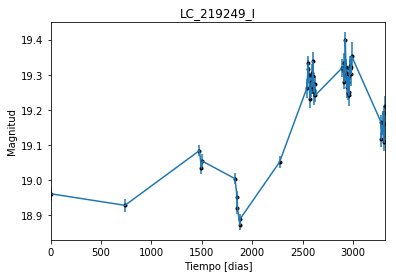

In [2]:
data = np.genfromtxt('LC_219249_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_219249_I')
plt.savefig("LC_219249_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

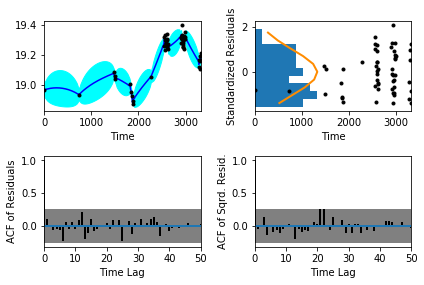

In [5]:
sample.assess_fit()

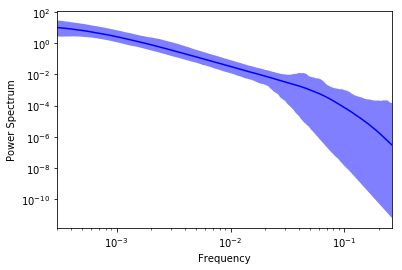

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

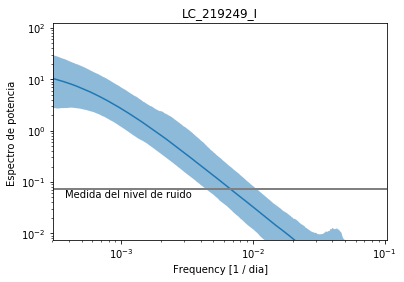

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_219249_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_219249_I')

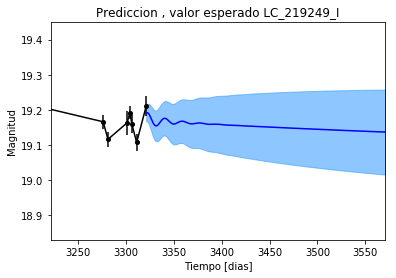

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_219249_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_219249_I')

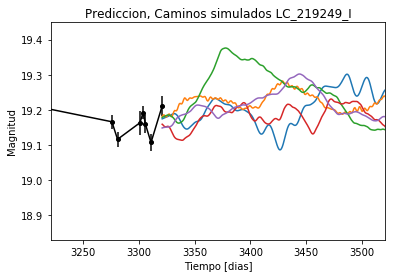

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_219249_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


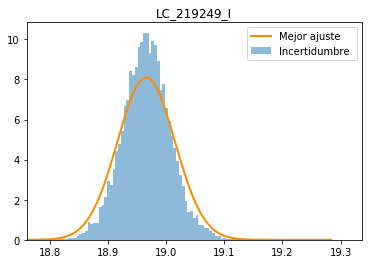

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_219249_I')
plt.savefig("Mejor_ajuste_LC_219249_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_219249_I')

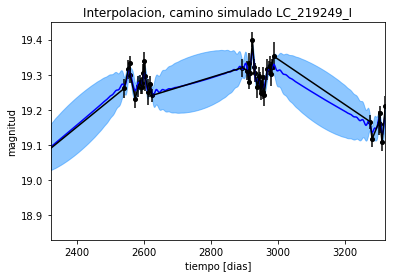

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_219249_I')

Text(0.5,1,'Interpolacion, camino simulado  LC_219249_I')

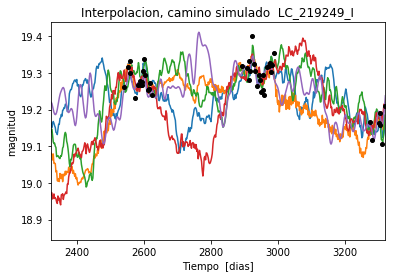

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_219249_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 235.671136718
Median: 0.0218008887395
Standard deviation: 0.106022828201
68% credibility interval: [ 0.0034509   0.13272735]
95% credibility interval: [ 0.00056287  0.40399943]
99% credibility interval: [  3.30995872e-04   4.99715592e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 302.040127016
Median: 0.0158997962295
Standard deviation: 0.0742346695485
68% credibility interval: [ 0.00198487  0.08141262]
95% credibility interval: [ 0.00036716  0.29654513]
99% credibility interval: [  3.19230709e-04   4.07056984e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 454.169703653
Median: 0.0895092459129
Standard deviation: 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 725.40298735
Median: 118.982831208
Standard deviation: 1.93420382893
68% credibility interval: [ 116.7872519   120.33706763]
95% credibility interval: [ 113.93004636  121.3359497 ]
99% credibility interval: [ 111.32522641  121.87008459]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 670.178099375
Median: 1.13860852978
Standard deviation: 1.4739914109
68% credibility interval: [ 0.28436333  3.05495124]
95% credibility interval: [ 0.06175891  5.57171065]
99% credibility interval: [ 0.02242759  6.89281507]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 254.164890724
Median: 1.20303712048
Standard deviation: 3.83791059867
68% credibility interval: [ 0.15538353  6.74749745]
95% credibility interval: [  0.02400871  12.8

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19929.5134869
Median: 7.44687355745e-36
Standard deviation: 1.16246433997e+74
68% credibility interval: [  4.14038521e-95   6.16898274e-10]
95% credibility interval: [  7.06520294e-122   6.52628638e+045]
99% credibility interval: [  6.18780140e-128   7.44322019e+070]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1167.89753193
Median: 19.0798635973
Standard deviation: 0.0709187031073
68% credibility interval: [ 19.0112864  19.1423367]
95% credibility interval: [ 18.92497516  19.21890861]
99% credibility interval: [ 18.86617942  19.28354653]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 399.752882422
Median: 0.0815986140634
Standard deviation: 0.150977293952
68% credibility interval: [ 0.02173468  0.33941741]
95% credibility interval: [ 0.          0.49599076]
99% credibility interval: [ 0.          0.51889773]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 399.752882422
Median: 0.0815986140634
Standard deviation: 0.150977293952
68% credibility interval: [ 0.02173468  0.33941741]
95% credibility interval: [ 0.          0.49599076]
99% credibility interval: [ 0.          0.51889773]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 349.968513122
Median: 0.0
Standard deviation: 0.00029569556666
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 725.40298735
Median: 118.982831208
Standard deviation: 1.93420382893
68% credibility interval: [ 116.7872519   120.33706763]
95% credibility interval: [ 113.93004636  121.3359497 ]
99% credibility interval: [ 111.32522641  121.87008459]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1027.0012626
Median: 0.0220881940252
Standard deviation: 0.0134296038227
68% credibility interval: [ 0.01486848  0.0349201 ]
95% credibility interval: [ 0.01045757  0.05738303]
99% credibility interval: [ 0.00858944  0.08418202]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1053.21209329
Median: 0.974800617833
Standard deviation: 0.187911285569
68% credibility interval: [ 0.81223898  1.17645022]
95% credibility interval: [ 0.68075457  1.42217972]
99% credibility interval: [ 0.61456687  1.59218823]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 391.567773985
Median: 0.00373974611153
Standard deviation: 0.0470804546693
68% credibility interval: [ 0.00020309  0.0394872 ]
95% credibility interval: [  4.13291130e-49   1.74775892e-01]
99% credibility interval: [  3.43027538e-74   2.73851698e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 235.671136718
Median: (-0.136979023812-0.593086246125j)
Standard deviation: 1.15915800794
68% credibility interval: [-0.83395055-0.6796477j  -0.02168264-2.13612458j]
95% credibility interval: [-2.53840330+0.j         -0.00353662-0.37852249j]
99% credibility interval: [ -3.13980567e+00+0.j          -2.07970840e-03-2.22216415j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 302.040127016
Median: (-0.0999013660563+1.8228282962j)
Standard deviation: 1.05708742551
68% credibility interval: [-0.51153059+0.5016772j  -0.01247129+0.24738829j]
95% credibility interval: [-1.86324801+0.71664888j -0.00230691+0.02565154j]
99% credibility interval: [ -2.55761446e+00+1.96085061j  -2.00578570e-03+1.53580944j]
Posterior summary for par